In [ ]:
!pip install langdetect langid polyglot fasttext
!apt-get install -y libicu-dev
!pip install pyicu

# additional data files for polyglot
!polyglot download LANG:en

# additional data files for fasttext
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
!gunzip cc.en.300.bin.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 41.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.4-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.4-py3-none-any.whl (240 kB)
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=e4c0ca30e3359f9a1cbc134a65da03242af799b6b4b65ccebd5c21aac7dc3b77
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
  Created wheel for langid: fil

In [30]:
from langdetect import detect, detect_langs
import langid
# from polyglot.detect import Detector
import fasttext

import pandas as pd

In [10]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
!gunzip cc.en.300.bin.gz

--2024-08-19 05:27:39--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.51, 3.163.189.108, 3.163.189.96, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz.1’

cc.en.300.bin.gz.1  100%[===================>]   4.19G   173MB/s    in 30s     

2024-08-19 05:28:09 (141 MB/s) - ‘cc.en.300.bin.gz.1’ saved [4503593528/4503593528]



In [9]:
ft = fasttext.load_model('cc.en.300.bin')

ValueError: cc.en.300.bin cannot be opened for loading!

In [46]:
def detect_lang_detect(text):
    try:
        return detect_langs(query)[0]
    except Exception as e:
        return str(e)


def detect_langid(text):
    try:
        return langid.classify(text)[0]
    except Exception as e:
        return str(e)


# def detect_polyglot(text):
#     try:
#         detector = Detector(text)
#         # If the detected language is English, return 'en', otherwise 'non-en'
#         return 'en' if detector.language.code == 'en' else 'non-en'
#     except Exception as e:
#         return str(e)

# def detect_fasttext(text):
#     try:
#         predictions = ft.predict(text)
#         # Check if the label is English
#         return 'en' if predictions[0][0].replace('__label__', '') == 'en' else 'non-en'
#     except Exception as e:
#         return str(e)

In [63]:
# queries = [
#     ("Can you pls rply ASAP?", 'en'),
#     ("Gonna grab some grub, BRB!", 'en'),
#     ("That’s a real head-scratcher!", 'en'),
#     ("We’ll meet @ 3, lol.", 'en'),
#     ("She’s got a flair for the dramatics, isn’t she?", 'en'),
#     ("Shakespeare’s plays are a real snooze-fest.", 'en'),
#     ("Shakespear kon thay?", 'non-en'),
#     ("Kiya aap ko kuch aata hai?", 'non-en'),
#     ('wen does office timing cloze?', 'en'),
#     ("Mujhe HR policies ki details explain karo", 'non-en'),
#     ("Kya programming seekhna asaan hai?", 'non-en'),
#     ("میں نے اس کی تلاش کی", 'non-en'),
#     ("میں نے اس کو دیکھا", 'non-en'),
#     ("قراءة الكتب تعزز العقل والفهم لدى الإنسان", 'non-en'),
#     ("تعليم الأطفال الأحلام الجميلة ضروري", 'non-en'),
#     ("الناس الذين يعيشون في المناطق الجبلية عادة ما يكونون مضيافين جدا", 'non-en'),
#     ('Qira’at al-kutub tu’azziz min dhaka’ al-insan wa fahmuhu', 'non-en'),
#     ('Hal min al-sahl ta', 'non-en'),
#     ("kiya programming seekhna easy hai?", 'non-en'),
#     ("mujhe HR policies ki details explain karo", 'non-en'),
#     ("Can you tell me about the 'Parlez-vous anglais?'", 'en'),
#     ("¿Dónde está el 'supermercado'?", 'non-en'),
#     ("我想知道 'weather' 的中文是什么?", 'non-en')
# ]

queries = [
    # English
    ("Can you pls rply ASAP?", 'en'),
    ("Gonna grab some grub, BRB!", 'en'),
    ("That’s a real head-scratcher!", 'en'),
    ("We’ll meet @ 3, lol.", 'en'),
    ("She’s got a flair for the dramatics, isn’t she?", 'en'),
    ("Shakespeare’s plays are a real snooze-fest.", 'en'),
    ("I’m really into existential philosophy. It’s quite a conundrum.", 'en'),
    ("The quick brown fox jumps over the lazy dog.", 'en'),
    ("What is the airspeed velocity of an unladen swallow?", 'en'),
    ("I have a bad feeling about this.", 'en'),
    ("Do you have a moment to talk about our lord and savior?", 'en'),
    ("Meet me at the intersection of Fourth and Main.", 'en'),
    ("Ever heard of Schrödinger’s cat?", 'en'),

    # English but nonsensical
    ("Elephant clock jump over the moonlight melody quickly?", 'en'),
    ("Syntax orange window sings softly beneath the whispering couch.", 'en'),
    ("Dancing robots eat thunder on floating yellow umbrellas?", 'en'),
    ("The quantum paperboat flies through musical rainbows of confusion.", 'en'),
    ("Curious shadows paint laughter while clocks eat stars?", 'en'),

    # Non-English (with some ambiguity and complexity)
    ("Shakespear kon thay?", 'non-en'),
    ("Kiya aap ko kuch aata hai?", 'non-en'),
    ("Mujhe HR policies ki details explain karo", 'non-en'),
    ("Kya programming seekhna asaan hai?", 'non-en'),
    ("میں نے اس کی تلاش کی", 'non-en'),
    ("میں نے اس کو دیکھا", 'non-en'),
    ("قراءة الكتب تعزز العقل والفهم لدى الإنسان", 'non-en'),
    ("تعليم الأطفال الأحلام الجميلة ضروري", 'non-en'),
    ("الناس الذين يعيشون في المناطق الجبلية عادة ما يكونون مضيافين جدا", 'non-en'),
    ("Qira’at al-kutub tu’azziz min dhaka’ al-insan wa fahmuhu", 'non-en'),
    ("Hal min al-sahl ta", 'non-en'),
    ("¿Dónde está el 'supermercado'?", 'non-en'),
    ("我想知道 'weather' 的中文是什么?", 'non-en'),
    ("¿Cómo se dice 'hello' en alemán?", 'non-en'),
    ("La vie est belle, n'est-ce pas?", 'non-en'),
    ("Voglio sapere come si chiama questo oggetto.", 'non-en'),
    ("Ek baar phir se, mujhe tumhe bata du", 'non-en'),
    ("Can you solve this riddle in French? Quel est le plus grand fleuve de France?", 'non-en'),
    ("Kis tarah se yeh kaam kiya jata hai?", 'non-en'), # Mixed Hindi and English
]

results = []

def check_langdetect_correct(langdetect_result, ground_truth):
  langdetect_result_lang = langdetect_result.lang
  if ground_truth == 'en':
    return langdetect_result_lang == 'en' and langdetect_result.prob >= 0.9
  else:
    return langdetect_result_lang != 'en'

def check_langid_correct(langid_result, ground_truth):
  if ground_truth == 'en':
    return langid_result == 'en'
  else:
    return langid_result != 'en'

for query, ground_truth in queries:
    langdetect_result = detect_lang_detect(query)
    langid_result = detect_langid(query)

    # Check if detection matches ground truth
    langdetect_correct = check_langdetect_correct(langdetect_result, ground_truth)
    langid_correct = check_langid_correct(langid_result, ground_truth)

    results.append({
        'Query': query,
        'Ground Truth': ground_truth,
        'Langdetect': langdetect_result,
        'Langid': langid_result,
        'Langdetect Correct': langdetect_correct,
        'Langid Correct': langid_correct
    })

results_df = pd.DataFrame(results)
# results_df.head()

# Filter rows where either Langdetect or Langid was not correct
incorrect_results_df = results_df[
    (results_df['Langdetect Correct'] == False) |
    (results_df['Langid Correct'] == False)
]

# Display the rows where either Langdetect or Langid wasn't correct
print("Rows where either Langdetect or Langid wasn't correct:")
(incorrect_results_df)

Rows where either Langdetect or Langid wasn't correct:


,Query,Ground Truth,Langdetect,Langid,Langdetect Correct,Langid Correct
1,"Gonna grab some grub, BRB!",en,sv:0.9999958425287139,en,False,True
3,"We’ll meet @ 3, lol.",en,nl:0.8571377190466428,en,False,True
12,Ever heard of Schrödinger’s cat?,en,en:0.9999971319323528,sv,True,False
18,Shakespear kon thay?,non-en,en:0.7142856590382669,en,False,False
30,我想知道 'weather' 的中文是什么?,non-en,en:0.9999965997091174,zh,False,True
34,"Ek baar phir se, mujhe tumhe bata du",non-en,id:0.9999969798594064,en,True,False


In [61]:
def calculate_accuracy_and_counts(results, key):
    correct_count = sum(result[key] for result in results)
    total_count = len(results)
    incorrect_count = total_count - correct_count
    accuracy = correct_count / total_count if total_count > 0 else 0
    return correct_count, incorrect_count, accuracy

langdetect_correct_count, langdetect_incorrect_count, langdetect_accuracy = calculate_accuracy_and_counts(results, 'Langdetect Correct')
langid_correct_count, langid_incorrect_count, langid_accuracy = calculate_accuracy_and_counts(results, 'Langid Correct')

print(f"Langdetect Accuracy: {langdetect_accuracy:.2%} ({langdetect_correct_count} correct, {langdetect_incorrect_count} incorrect)")
print(f"Langid Accuracy: {langid_accuracy:.2%} ({langid_correct_count} correct, {langid_incorrect_count} incorrect)")


Langdetect Accuracy: 86.49% (32 correct, 5 incorrect)
Langid Accuracy: 91.89% (34 correct, 3 incorrect)


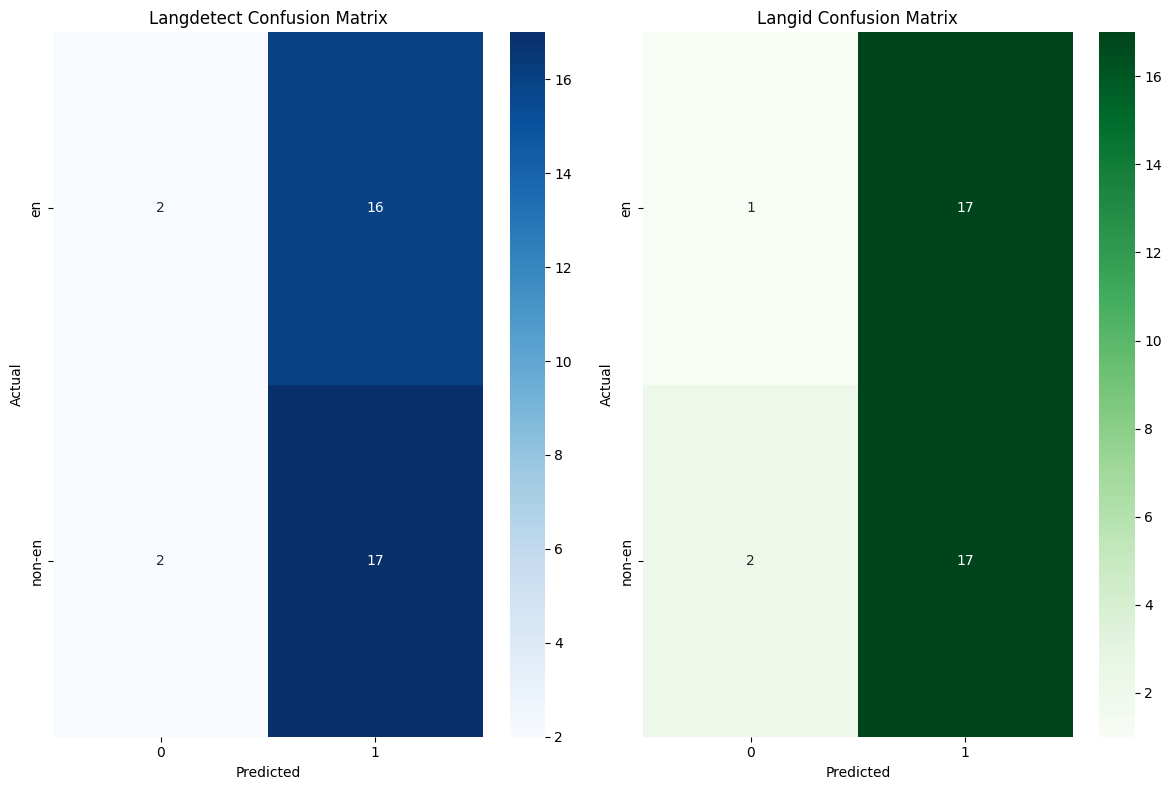

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for confusion matrix
# Create confusion matrices for Langdetect and Langid
conf_matrix_langdetect = pd.crosstab(results_df['Ground Truth'], results_df['Langdetect Correct'], rownames=['Actual'], colnames=['Predicted'])
conf_matrix_langid = pd.crosstab(results_df['Ground Truth'], results_df['Langid Correct'], rownames=['Actual'], colnames=['Predicted'])

# Combine the confusion matrices into a single DataFrame
combined_conf_matrix = pd.DataFrame({
    'Langdetect': conf_matrix_langdetect.fillna(0).astype(int).values.flatten(),
    'Langid': conf_matrix_langid.fillna(0).astype(int).values.flatten()
}, index=pd.MultiIndex.from_product([conf_matrix_langdetect.index, conf_matrix_langdetect.columns], names=['Actual', 'Predicted']))

# Plotting
plt.figure(figsize=(12, 8))

# Plot heatmap for Langdetect and Langid confusion matrices side by side
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_langdetect, annot=True, cmap='Blues', fmt='d')
plt.title('Langdetect Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_langid, annot=True, cmap='Greens', fmt='d')
plt.title('Langid Confusion Matrix')

plt.tight_layout()
plt.show()
